In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from DeepPurpose import DTI as models
from tqdm import tqdm
from unipressed import IdMappingClient
from utils import get_sequence_from_target_name, get_smiles_from_compound_name

In [2]:
drug_gene = pd.read_csv("moa_with_top5.csv", index_col=0)
drug_gene.head()

,NSC,drug,gene,num,rank,dti_existed,predicted_positive,drug_gene,pubmed_hit,top5,key,MECHANISM
0,740,Methotrexate,TYMS,67,3,1,1,740_TYMS,True,True,740_TYMS,DNA
1,740,Methotrexate,ATIC,67,1,1,1,740_ATIC,True,True,740_ATIC,DNA
2,752,Thioguanine,BST2,0,5,0,0,752_BST2,False,True,752_BST2,DNA
3,752,Thioguanine,APBB1IP,0,1,0,0,752_APBB1IP,False,True,752_APBB1IP,DNA
4,752,Thioguanine,SLC43A3,2,3,0,1,752_SLC43A3,True,True,752_SLC43A3,DNA


In [3]:
gene_names = drug_gene["gene"].unique()

request = IdMappingClient.submit(
    source="GeneCards", dest="UniProtKB", ids=set(gene_names)
)

time.sleep(1.0)
mappings = list(request.each_result())

In [4]:
tmp = pd.DataFrame(mappings)
tmp.columns = ["gene", "uniprot"]
tmp.head()

,gene,uniprot
0,TOP1,P11387
1,HSP90AA1,P07900
2,NISCH,Q9Y2I1
3,NCKAP1,Q9Y2A7
4,AURKB,Q96GD4


# Unique genes

In [5]:
len(set(drug_gene["gene"]))

297

# Uniprot missing genes

In [6]:
print(len((set(drug_gene["gene"])) - set(tmp["gene"])))
(set(drug_gene["gene"])) - set(tmp["gene"])

39


{'AFAP1-AS1',
 'CRNDE',
 'CXorf57',
 'HIST1H1A',
 'HIST1H2BB',
 'HIST1H3F',
 'HIST1H3G',
 'HIST1H3I',
 'HIST1H4D',
 'HIST1H4E',
 'HIST1H4L',
 'IPW',
 'KRT18P10',
 'KRT18P16',
 'KRT18P32',
 'KRT18P40',
 'KRT18P47',
 'KRT8P10',
 'KRT8P2',
 'KRT8P30',
 'KRT8P34',
 'KRT8P42',
 'KRT8P43',
 'KRT8P47',
 'KRT8P48',
 'KRT8P5',
 'LINC00857',
 'LOC100128816',
 'LRRC16A',
 'ND2',
 'ND4',
 'PRKXP1',
 'PTRF',
 'RNA45S5',
 'RPS17P5',
 'SEPT10',
 'SNORD116-27',
 'SPG20',
 'ZNF667-AS1'}

In [7]:
drug_gene = drug_gene.merge(tmp)
drug_gene.shape

(4037, 13)

In [8]:
# smiles = [get_smiles_from_compound_name(i) for i in tqdm(drug_gene['drug'].unique())]
# drug2smiles = pd.DataFrame([drug_gene['drug'].unique(), smiles], index=['drug', 'smiles']).T
drug2smiles = pd.read_csv("drug2smiles.csv", index_col=0)
drug_gene = drug_gene.merge(drug2smiles)
drug_gene.head()

,NSC,drug,gene,num,rank,dti_existed,predicted_positive,drug_gene,pubmed_hit,top5,key,MECHANISM,uniprot,smiles
0,740,Methotrexate,TYMS,67,3,1,1,740_TYMS,True,True,740_TYMS,DNA,P04818,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...
1,740,Methotrexate,ATIC,67,1,1,1,740_ATIC,True,True,740_ATIC,DNA,P31939,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...
2,752,Thioguanine,BST2,0,5,0,0,752_BST2,False,True,752_BST2,DNA,Q10589,C1=NC2=C(N1)C(=S)N=C(N2)N
3,752,Thioguanine,APBB1IP,0,1,0,0,752_APBB1IP,False,True,752_APBB1IP,DNA,Q7Z5R6,C1=NC2=C(N1)C(=S)N=C(N2)N
4,752,Thioguanine,SLC43A3,2,3,0,1,752_SLC43A3,True,True,752_SLC43A3,DNA,Q8NBI5,C1=NC2=C(N1)C(=S)N=C(N2)N


In [9]:
# sequences = [get_sequence_from_target_name(i) for i in tqdm(drug_gene['uniprot'].unique())]
# tmp = pd.DataFrame([drug_gene['uniprot'].unique(), sequences], index=['uniprot', 'sequences']).T
tmp = pd.read_csv("uni2seq.csv", index_col=0)
drug_gene = drug_gene.merge(tmp)
drug_gene.head()

,NSC,drug,gene,num,rank,dti_existed,predicted_positive,drug_gene,pubmed_hit,top5,key,MECHANISM,uniprot,smiles,sequences
0,740,Methotrexate,TYMS,67,3,1,1,740_TYMS,True,True,740_TYMS,DNA,P04818,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,MPVAGSELPRRPLPPAAQERDAEPRPPHGELQYLGQIQHILRCGVR...
1,740,Methotrexate,ATIC,67,1,1,1,740_ATIC,True,True,740_ATIC,DNA,P31939,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,MAPGQLALFSVSDKTGLVEFARNLTALGLNLVASGGTAKALRDAGL...
2,752,Thioguanine,BST2,0,5,0,0,752_BST2,False,True,752_BST2,DNA,Q10589,C1=NC2=C(N1)C(=S)N=C(N2)N,MASTSYDYCRVPMEDGDKRCKLLLGIGILVLLIIVILGVPLIIFTI...
3,752,Thioguanine,APBB1IP,0,1,0,0,752_APBB1IP,False,True,752_APBB1IP,DNA,Q7Z5R6,C1=NC2=C(N1)C(=S)N=C(N2)N,MGESSEDIDQMFSTLLGEMDLLTQSLGVDTLPPPDPNPPRAEFNYS...
4,752,Thioguanine,SLC43A3,2,3,0,1,752_SLC43A3,True,True,752_SLC43A3,DNA,Q8NBI5,C1=NC2=C(N1)C(=S)N=C(N2)N,MAGQGLPLHVATLLTGLLECLGFAGVLFGWPSLVFVFKNEDYFKDL...


In [10]:
drug_gene.shape

(4037, 15)

In [11]:
net = models.model_pretrained("MPNN_CNN_BDB")

/Users/inouey2/miniconda3/envs/torch/lib/python3.10/site-packages/DeepPurpose/DTI.py:588: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_loc

In [12]:
drug_gene.head()

,NSC,drug,gene,num,rank,dti_existed,predicted_positive,drug_gene,pubmed_hit,top5,key,MECHANISM,uniprot,smiles,sequences
0,740,Methotrexate,TYMS,67,3,1,1,740_TYMS,True,True,740_TYMS,DNA,P04818,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,MPVAGSELPRRPLPPAAQERDAEPRPPHGELQYLGQIQHILRCGVR...
1,740,Methotrexate,ATIC,67,1,1,1,740_ATIC,True,True,740_ATIC,DNA,P31939,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,MAPGQLALFSVSDKTGLVEFARNLTALGLNLVASGGTAKALRDAGL...
2,752,Thioguanine,BST2,0,5,0,0,752_BST2,False,True,752_BST2,DNA,Q10589,C1=NC2=C(N1)C(=S)N=C(N2)N,MASTSYDYCRVPMEDGDKRCKLLLGIGILVLLIIVILGVPLIIFTI...
3,752,Thioguanine,APBB1IP,0,1,0,0,752_APBB1IP,False,True,752_APBB1IP,DNA,Q7Z5R6,C1=NC2=C(N1)C(=S)N=C(N2)N,MGESSEDIDQMFSTLLGEMDLLTQSLGVDTLPPPDPNPPRAEFNYS...
4,752,Thioguanine,SLC43A3,2,3,0,1,752_SLC43A3,True,True,752_SLC43A3,DNA,Q8NBI5,C1=NC2=C(N1)C(=S)N=C(N2)N,MAGQGLPLHVATLLTGLLECLGFAGVLFGWPSLVFVFKNEDYFKDL...


In [13]:
drugs = drug_gene["smiles"]
targets = drug_gene["sequences"]
drug_names = drug_gene["drug"]
target_names = drug_gene["gene"]

predictions = models.virtual_screening(
    drugs,
    targets,
    net,
    drug_names,
    target_names,
)

virtual screening...
Drug Target Interaction Prediction Mode...
in total: 4037 drug-target pairs
encoding drug...
unique drugs: 910
encoding protein...
unique target sequence: 258
Done.
predicting...
---------------
Virtual Screening Result
+------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+-------------+-------------+
| Rank |                                                                                                                                                     Drug Name                                                                                                                                                      | Target Name | Interaction | Probability |
+------+-------------------------------

In [14]:
drug_gene["deeppurpose"] = predictions
drug_gene = drug_gene[
    ["drug", "gene", "dti_existed", "pubmed_hit", "MECHANISM", "deeppurpose"]
]
drug_gene

,drug,gene,dti_existed,pubmed_hit,MECHANISM,deeppurpose
0,Methotrexate,TYMS,1,True,DNA,0.789563
1,Methotrexate,ATIC,1,True,DNA,0.959494
2,Thioguanine,BST2,0,False,DNA,0.000133
3,Thioguanine,APBB1IP,0,False,DNA,0.000518
4,Thioguanine,SLC43A3,0,True,DNA,0.000699
...,...,...,...,...,...,...
4032,Futibatinib,EPAS1,0,False,Kinase,0.130843
4033,Futibatinib,ZBTB38,0,False,Kinase,0.296181
4034,4-methyl-3-(1-methyl-6-(pyridin-3-yl)-1H-pyraz...,IFI16,0,False,Other,0.010784
4035,4-methyl-3-(1-methyl-6-(pyridin-3-yl)-1H-pyraz...,PSMB8,0,False,Other,0.044471


In [15]:
print("Unique drugs:", len(drug_gene["drug"].unique()))
print("Unique genes:", len(drug_gene["gene"].unique()))

Unique drugs: 931
Unique genes: 258


In [16]:
drug_gene = drug_gene.copy()
drug_gene["binary_deeppurpose"] = np.int16(drug_gene["deeppurpose"] > 0.5)
drug_gene.head()

,drug,gene,dti_existed,pubmed_hit,MECHANISM,deeppurpose,binary_deeppurpose
0,Methotrexate,TYMS,1,True,DNA,0.789563,1
1,Methotrexate,ATIC,1,True,DNA,0.959494,1
2,Thioguanine,BST2,0,False,DNA,0.000133,0
3,Thioguanine,APBB1IP,0,False,DNA,0.000518,0
4,Thioguanine,SLC43A3,0,True,DNA,0.000699,0


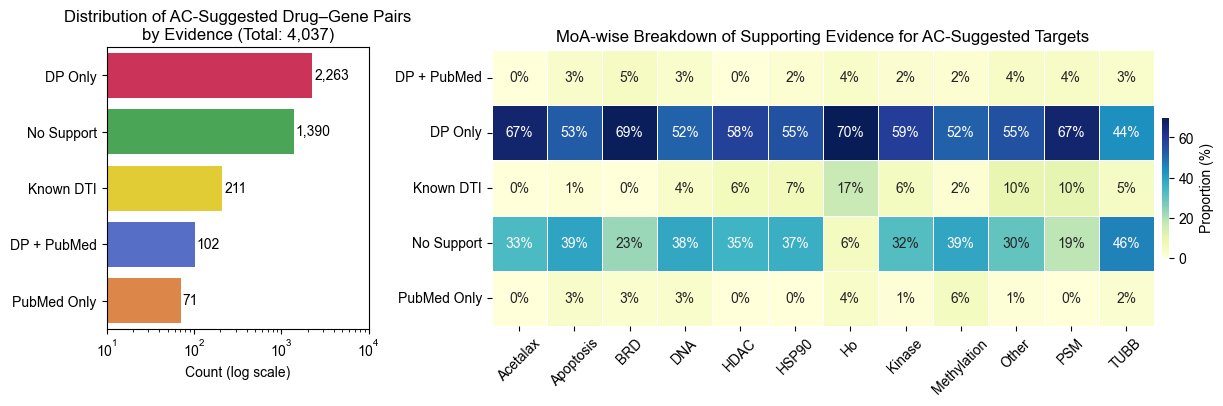

In [18]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
fontsize = 10
plt.rcParams["font.size"] = fontsize

color_list = [
    "#e6194b",
    "#3cb44b",
    "#ffe119",
    "#4363d8",
    "#f58231",
    "#911eb4",
    "#46f0f0",
    "#f032e6",
    "#bcf60c",
    "#fabebe",
    "#008080",
    "#e6beff",
    "#9a6324",
    "#fffac8",
    "#800000",
    "#aaffc3",
    "#808000",
    "#ffd8b1",
    "#000075",
    "#808080",
    "#ffffff",
    "#000000",
]

# Prepare a dataset filtered for necessary fields and remove NaN
viz_df = drug_gene[
    ["MECHANISM", "gene", "dti_existed", "binary_deeppurpose", "pubmed_hit"]
].dropna()

# Convert necessary fields to int
viz_df["dti_existed"] = viz_df["dti_existed"].astype(int)
viz_df["binary_deeppurpose"] = viz_df["binary_deeppurpose"].astype(int)
viz_df["pubmed_hit"] = viz_df["pubmed_hit"].astype(int)


# サポートカテゴリの定義（簡潔化）
def categorize(row):
    if row["dti_existed"] == 1:
        return "Known DTI"
    elif row["binary_deeppurpose"] == 1 and row["pubmed_hit"] == 1:
        return "DP + PubMed"
    elif row["binary_deeppurpose"] == 1:
        return "DP Only"
    elif row["pubmed_hit"] == 1:
        return "PubMed Only"
    else:
        return "No Support"


viz_df["prediction_category"] = viz_df.apply(categorize, axis=1)

# クロス集計して割合に変換（行合計で正規化）
support_counts = pd.crosstab(viz_df["MECHANISM"], viz_df["prediction_category"])
support_percent = support_counts.div(support_counts.sum(axis=1), axis=0) * 100
support_annot = support_percent.round(0).astype(int).astype(str) + "%"

# Count categories
category_counts = viz_df["prediction_category"].value_counts().reset_index()
category_counts.columns = ["Prediction Category", "Count"]

total_count = category_counts["Count"].sum()

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(13, 4), gridspec_kw={"width_ratios": [0.6, 1.8]}
)

# 横向きBarplot（棒の右に値を表示）
sns.barplot(
    data=category_counts.assign(Hue=category_counts["Prediction Category"]),
    y="Prediction Category",
    x="Count",
    hue="Hue",
    palette=color_list[: len(category_counts)],
    ax=ax1,
)
ax1.set_xscale("log")
ax1.set_xlim(10, category_counts["Count"].max() * 4.5)
ax1.set_title(
    "Distribution of AC-Suggested Drug–Gene Pairs\nby Evidence (Total: {:,})".format(
        total_count
    )
)
ax1.set_xlabel("Count (log scale)")
ax1.set_ylabel("")

# 各バーの横に値を表示
for i, row in category_counts.iterrows():
    ax1.text(
        x=row["Count"] * 1.05,  # 少し右にずらす
        y=i,
        s=f"{int(row['Count']):,}",  # カンマ区切り
        va="center",
        fontsize=fontsize,
    )

# Transpose heatmap data
support_percent_t = support_percent.T
support_annot_t = support_percent_t.round(0).astype(int).astype(str) + "%"

# Heatmap on the right
sns.heatmap(
    support_percent_t,
    annot=support_annot_t,
    fmt="",
    cmap="YlGnBu",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.5, "pad": 0.01},
    ax=ax2,
)
ax2.collections[0].colorbar.set_label("Proportion (%)")
ax2.set_title("MoA-wise Breakdown of Supporting Evidence for AC-Suggested Targets")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.tick_params(axis="x", rotation=45)
ax2.tick_params(axis="y")

plt.tight_layout()
plt.savefig("compWithDP.pdf", format="pdf", bbox_inches="tight")  # ← PDF保存
plt.show()